# GRIP: The Sparks Foundation
## Data Science and Business Analytics Intern
### Task 4: Exploratory Data Analysis - Terrorism (Level: Intermediate)
#### Dataset: 'globalterrorismdb_0718dist.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_terrorism=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [4]:
df_terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df_terrorism.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
df_terrorism.shape

(181691, 135)

In [7]:
df_terrorism.size

24528285

In [8]:
df_terrorism = df_terrorism[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','attacktype1_txt',
         'targtype1_txt','gname','weaptype1_txt','nkill']]
df_terrorism.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',
                   'region_txt':'Region','city':'City','success':'Success','suicide':'Suicide','attacktype1_txt':'Attack_Type',
                   'targtype1_txt':'Target_Type','gname':'Attack_Group',
                   'weaptype1_txt':'Weapon','nkill':'Number_of_Killed'},inplace=True)

In [9]:
df_terrorism.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,Target_Type,Attack_Group,Weapon,Number_of_Killed
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN


In [10]:
df_terrorism.tail()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,Target_Type,Attack_Group,Weapon,Number_of_Killed
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,Ceelka Geelow,1,0,Armed Assault,Military,Al-Shabaab,Firearms,1.0
181687,2017,12,31,0,Syria,Middle East & North Africa,Jableh,1,0,Bombing/Explosion,Military,Muslim extremists,Explosives,2.0
181688,2017,12,31,0,Philippines,Southeast Asia,Kubentog,1,0,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0
181689,2017,12,31,0,India,South Asia,Imphal,0,0,Bombing/Explosion,Government (General),Unknown,Explosives,0.0
181690,2017,12,31,0,Philippines,Southeast Asia,Cotabato City,0,0,Bombing/Explosion,Unknown,Unknown,Explosives,0.0


In [11]:
df_terrorism.shape

(181691, 14)

In [12]:
df_terrorism.size

2543674

In [13]:
df_terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              181691 non-null  int64  
 1   Month             181691 non-null  int64  
 2   Day               181691 non-null  int64  
 3   Extended          181691 non-null  int64  
 4   Country           181691 non-null  object 
 5   Region            181691 non-null  object 
 6   City              181257 non-null  object 
 7   Success           181691 non-null  int64  
 8   Suicide           181691 non-null  int64  
 9   Attack_Type       181691 non-null  object 
 10  Target_Type       181691 non-null  object 
 11  Attack_Group      181691 non-null  object 
 12  Weapon            181691 non-null  object 
 13  Number_of_Killed  171378 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 19.4+ MB


#### Obsevation

- **Year** This field contains the year in which the incident occurred.

- **Month** This field contains the number of the month in which the incident occurred.

- **Day** This field contains the numeric day of the month on which the incident occurred.

- **Extended** 1 = "Yes" The duration of an incident extended more than 24 hours. 0 = "No" The duration of an incident extended less

- **Country** This field identifies the country or location where the incident occurred.

- **Region** This field identifies the region in which the incident occurred.

- **City** Name of the city, village, or town in which the incident occurred

- **Success** Success of a terrorist strike

- **Suicide** 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide

- **Attack_Type**  The general method of attack and broad class of tactics used.

- **Target_Type** The general type of target/victim

- **Target_Sub_Type**  The more specific target category

- **Attack_Group** The name of the group that carried out the attack

- **Weapon** General type of weapon used in the incident

- **Number_of_Killed** The number of total confirmed fatalities for the incident

In [14]:
for colname,colval in df_terrorism.iteritems():
    print(colname,':',df_terrorism[colname].nunique())

Year : 47
Month : 13
Day : 32
Extended : 2
Country : 205
Region : 12
City : 36674
Success : 2
Suicide : 2
Attack_Type : 9
Target_Type : 22
Attack_Group : 3537
Weapon : 12
Number_of_Killed : 205


In [15]:
for colname,colval in df_terrorism.iteritems():
    if df_terrorism[colname].dtype==object and df_terrorism[colname].nunique()<50:
        print(colname,':',df_terrorism[colname].unique())

Region : ['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']
Attack_Type : ['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']
Target_Type : ['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']
Weapon : ['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (not to inc

In [16]:
df_terrorism.isnull().sum()

Year                    0
Month                   0
Day                     0
Extended                0
Country                 0
Region                  0
City                  434
Success                 0
Suicide                 0
Attack_Type             0
Target_Type             0
Attack_Group            0
Weapon                  0
Number_of_Killed    10313
dtype: int64

In [17]:
df_terrorism['City'].fillna('Unknown',inplace=True)
df_terrorism['Number_of_Killed'].fillna(0,inplace=True)

In [18]:
df_terrorism.isnull().sum()

Year                0
Month               0
Day                 0
Extended            0
Country             0
Region              0
City                0
Success             0
Suicide             0
Attack_Type         0
Target_Type         0
Attack_Group        0
Weapon              0
Number_of_Killed    0
dtype: int64

In [19]:
df_terrorism.duplicated().sum()

15707

In [20]:
df_terrorism.drop_duplicates(keep='first',inplace=True)

In [21]:
df_terrorism.shape

(165984, 14)

## Univariate Analysis

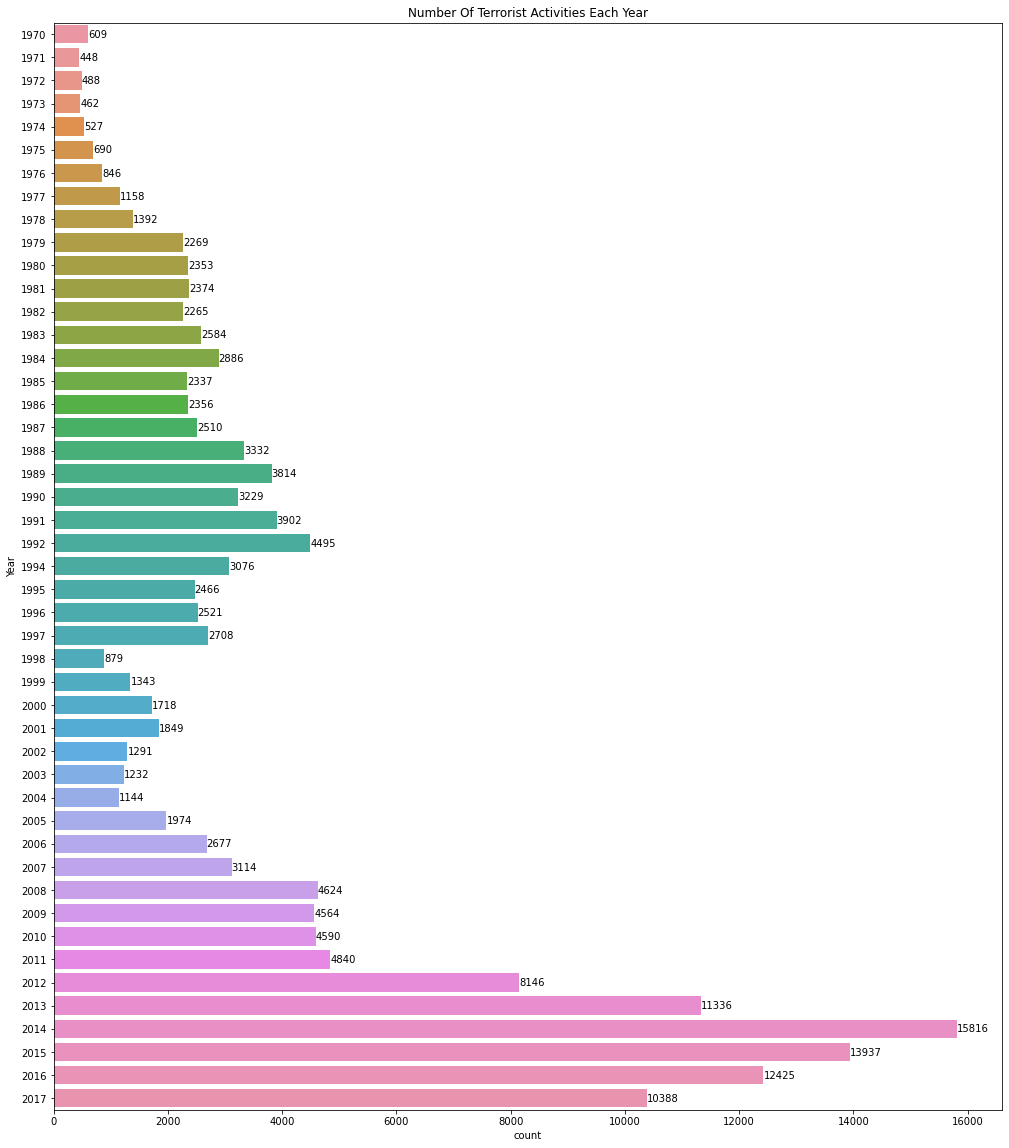

In [22]:
plt.figure(figsize=(17,20))
ax=sns.countplot(y=df_terrorism['Year'])
ax.bar_label(ax.containers[0],label_type='edge')
plt.title('Number Of Terrorist Activities Each Year');

**Observation:** The terrorist attack peaked from **2012** with year **2014 as the highest number of terrorist attacks** followed by **2015 and 2016**

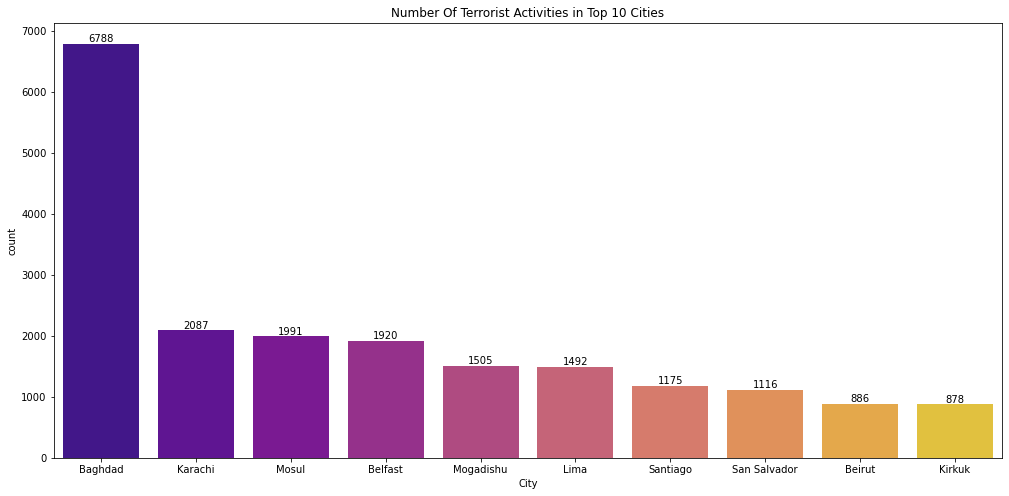

In [105]:
plt.figure(figsize=(17,8))
ax=sns.countplot(df_terrorism['City'],order=df_terrorism['City'].value_counts().index[1:11],palette='plasma')
ax.bar_label(ax.containers[0],label_type='edge')
plt.title('Number Of Terrorist Activities in Top 10 Cities');

**Observation:** Most of number of terrorist activities was observed in the city of **Baghdad** and **Karachi**

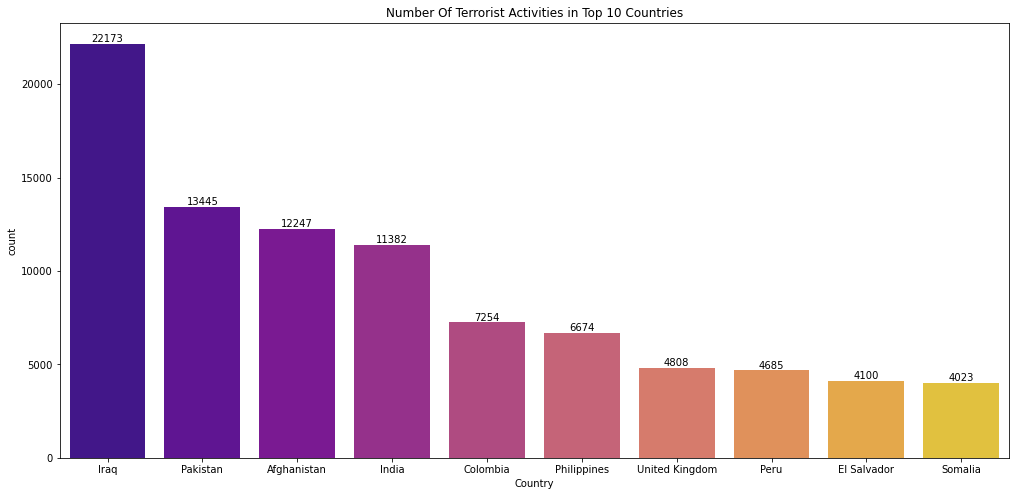

In [24]:
plt.figure(figsize=(17,8))
ax=sns.countplot(df_terrorism['Country'],order=df_terrorism['Country'].value_counts().index[:10],palette='plasma')
ax.bar_label(ax.containers[0],label_type='edge')
plt.title('Number Of Terrorist Activities in Top 10 Countries');

**Observation:** **Iraq**,**Pakistan** and **Afghanistan** were the major countries for the terrorist activities.

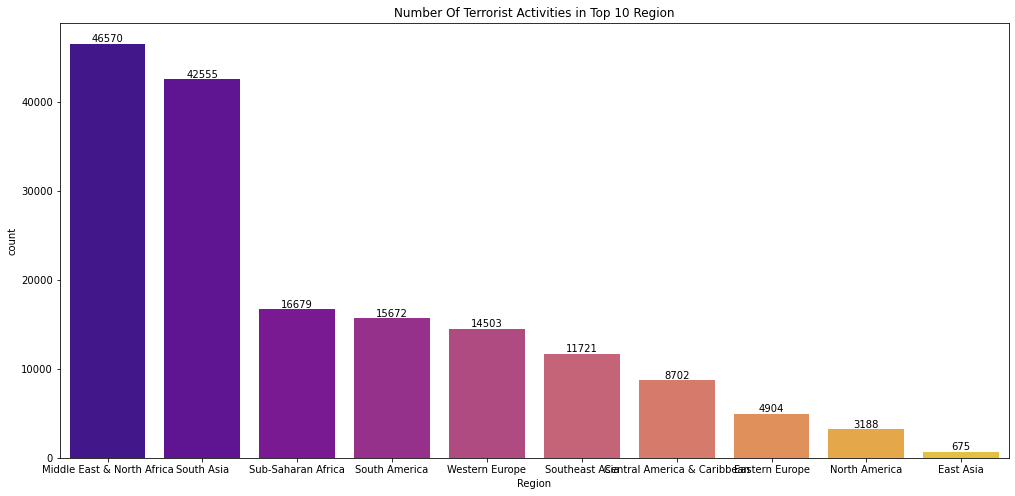

In [25]:
plt.figure(figsize=(17,8))
ax=sns.countplot(df_terrorism['Region'],order=df_terrorism['Region'].value_counts().index[:10],palette='plasma')
ax.bar_label(ax.containers[0],label_type='edge')
plt.title('Number Of Terrorist Activities in Top 10 Region');

**Observation:** The terrorist attacks in the region **Middle East,North Africa** and **South Asia** are more frequent.

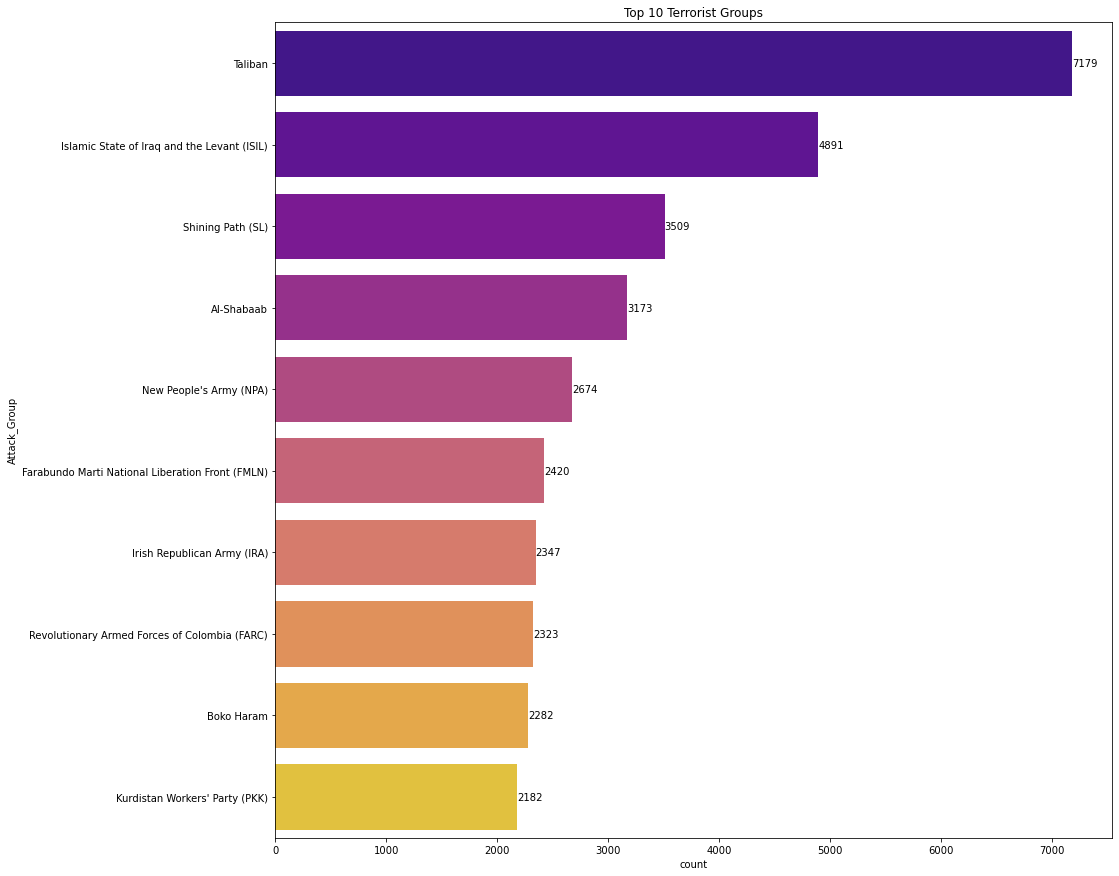

In [75]:
plt.figure(figsize=(15,15))
ax=sns.countplot(y=df_terrorism['Attack_Group'],order=df_terrorism['Attack_Group'].value_counts().index[1:11],palette='plasma')
ax.bar_label(ax.containers[0],label_type='edge')
plt.title('Top 10 Terrorist Groups');

**Observation:** The terrorist attacks were mostly caused by attack groups known as **Taliban** and **Islamic State of Iraq and the Levant (ISIL)**

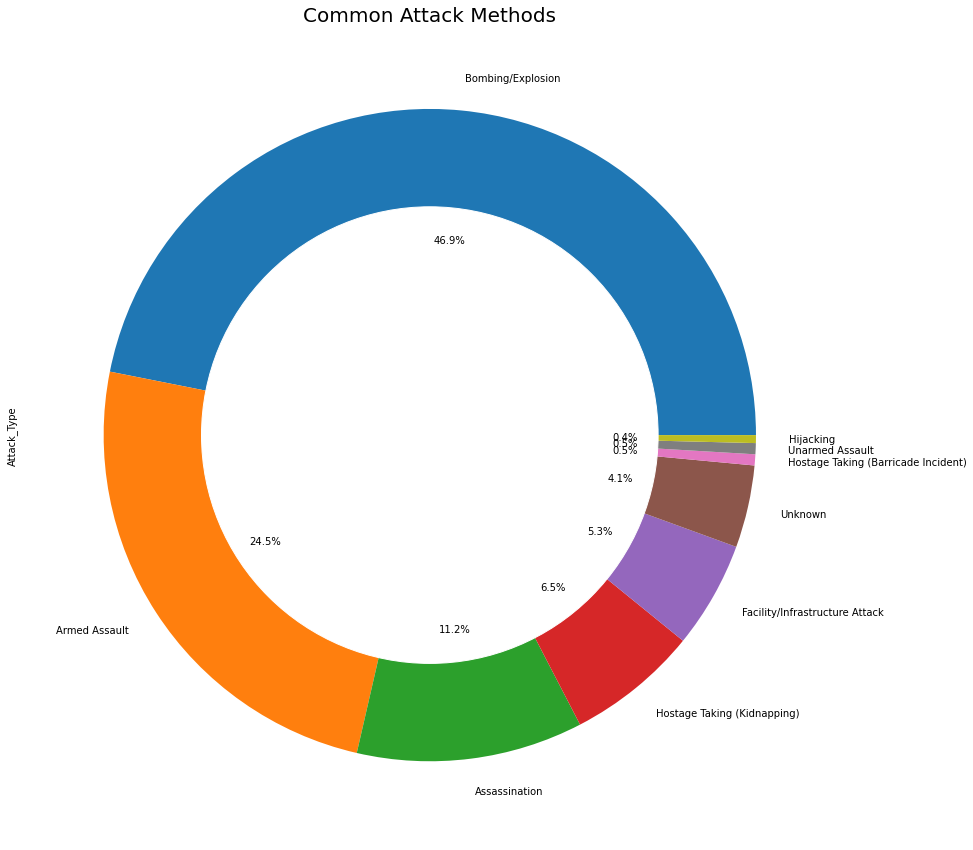

In [26]:
df_terrorism['Attack_Type'].value_counts().plot.pie(y='mass', figsize=(15, 15),autopct='%1.1f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Common Attack Methods',fontsize = 20);

**Observation:** **Bombing/Explosion,Armed Assualt and Assasinations** makes up for more than **85%** of attack methods.

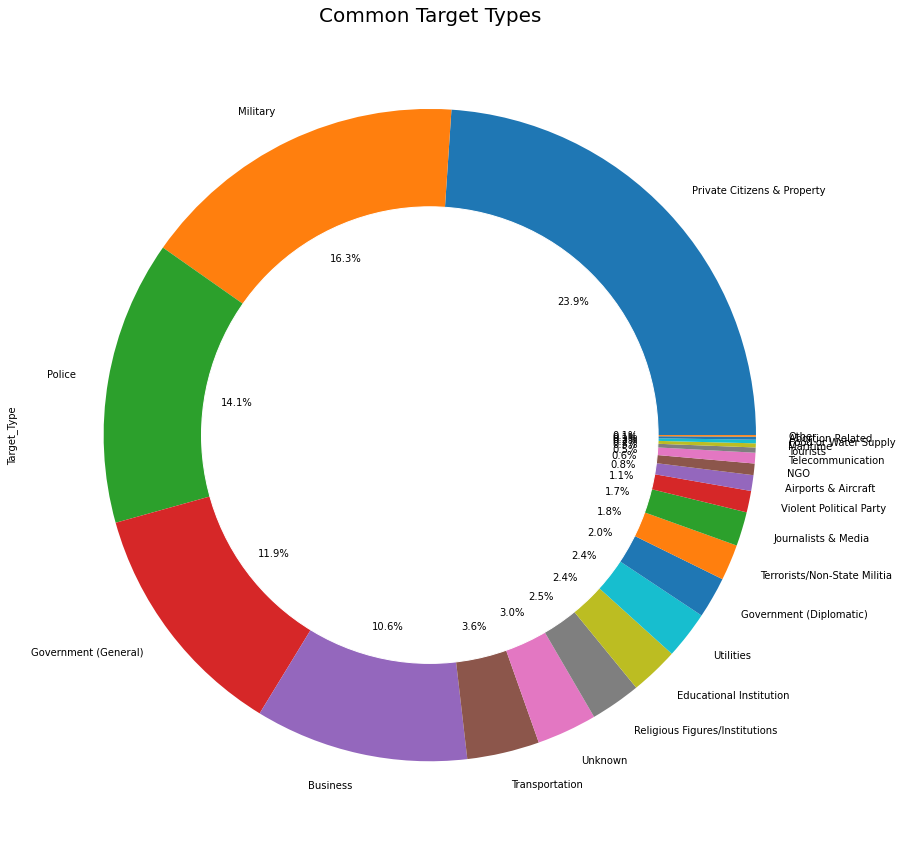

In [107]:
df_terrorism['Target_Type'].value_counts().plot.pie(y='mass', figsize=(15, 15),autopct='%1.1f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Common Target Types',fontsize = 20);

**Observation:** Most common types of targets includes **Private citizen and Property,Military, Police and Government** with more than **65%** of total targets.

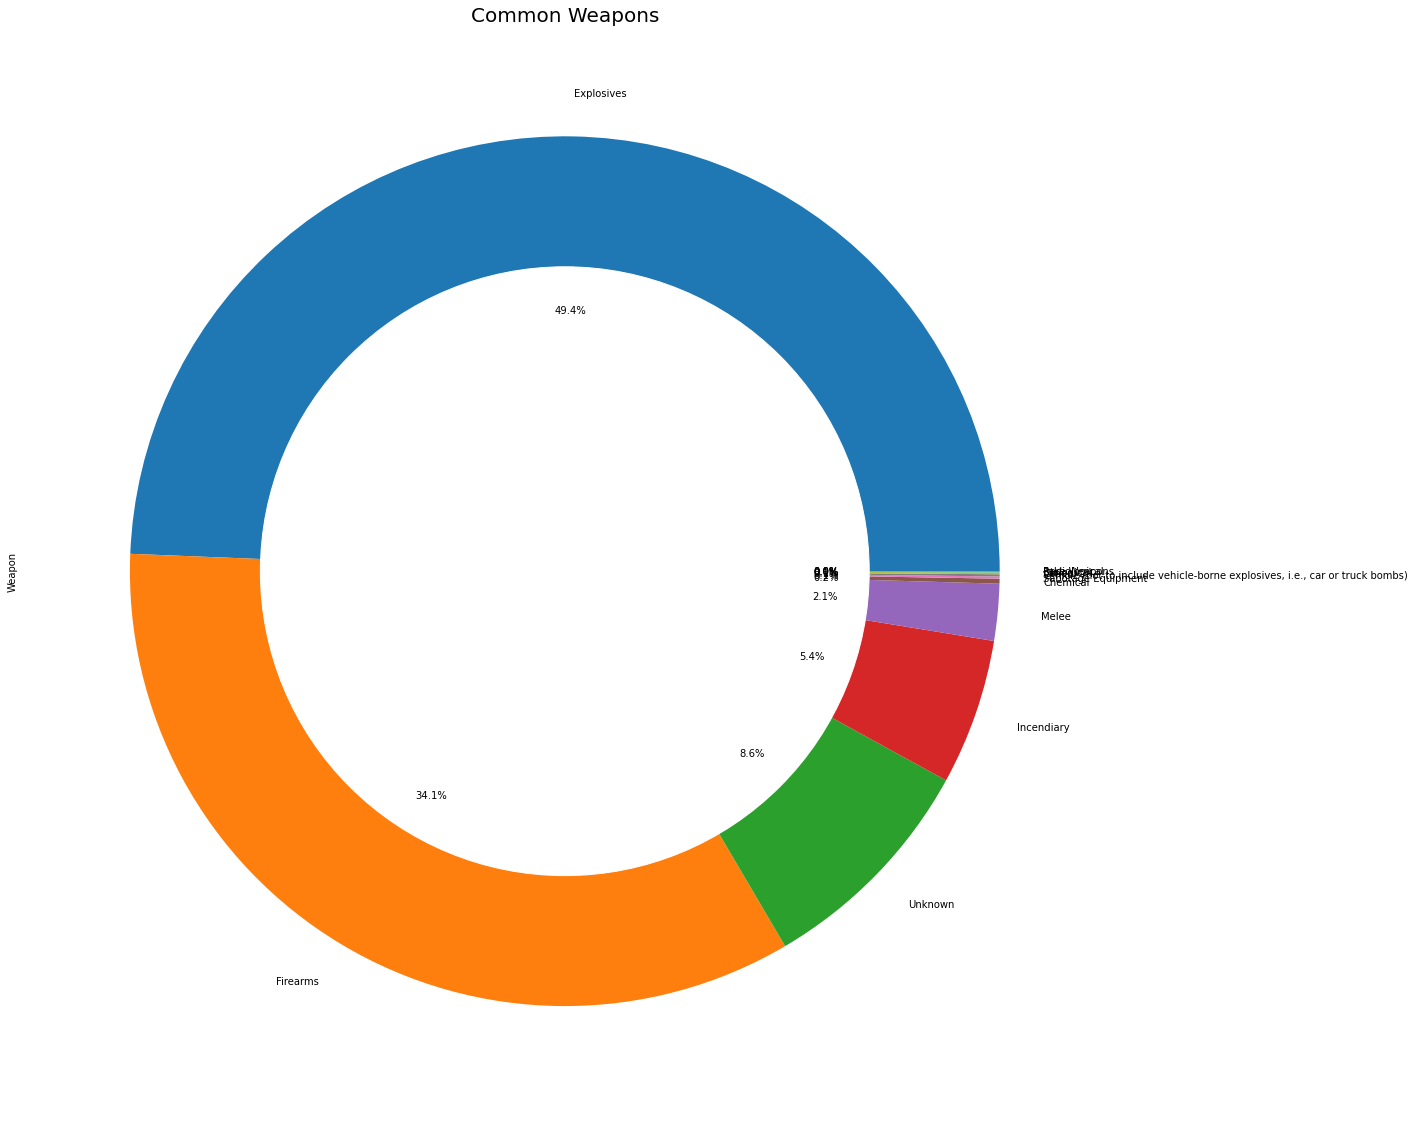

In [ ]:
df_terrorism['Weapon'].value_counts().plot.pie(y='mass', figsize=(20, 20),autopct='%1.1f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Common Weapons',fontsize = 20);

**Observation:** **Explosives and Firearms** makes for more than **85%** of the weapons used in terrorist activites.

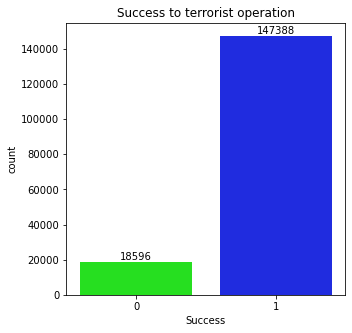

In [29]:
plt.figure(figsize=(5,5))
ax=sns.countplot(df_terrorism['Success'],palette='hsv')
ax.bar_label(ax.containers[0],label_type='edge')
plt.title('Success to terrorist operation');

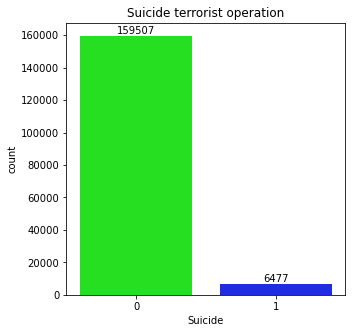

In [30]:
plt.figure(figsize=(5,5))
ax=sns.countplot(df_terrorism['Suicide'],palette='hsv')
ax.bar_label(ax.containers[0],label_type='edge')
plt.title('Suicide terrorist operation');

## Bivariate Analysis

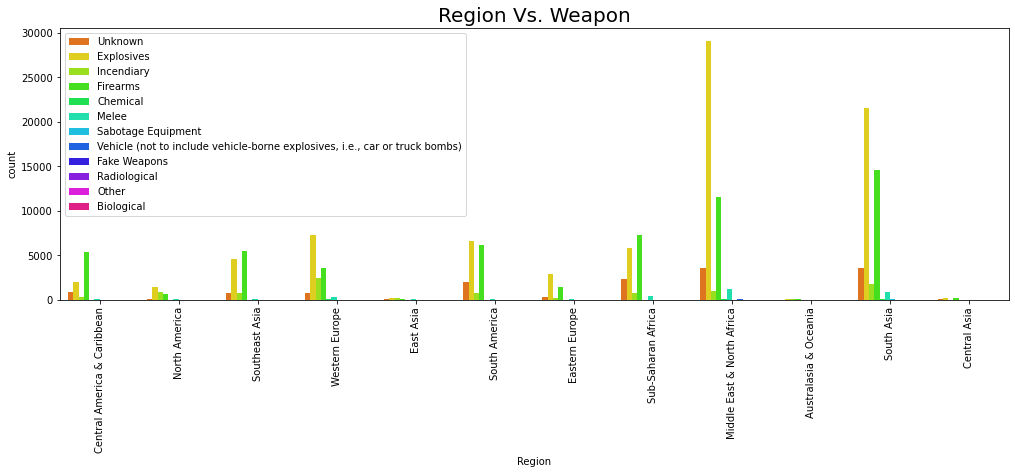

In [31]:
plt.figure(figsize=(17,5))
sns.countplot(x="Region", hue ='Weapon', data = df_terrorism,palette = "hsv")
plt.title('Region Vs. Weapon', fontsize = 20)
plt.legend(loc='upper left')
plt.xticks(rotation=90);

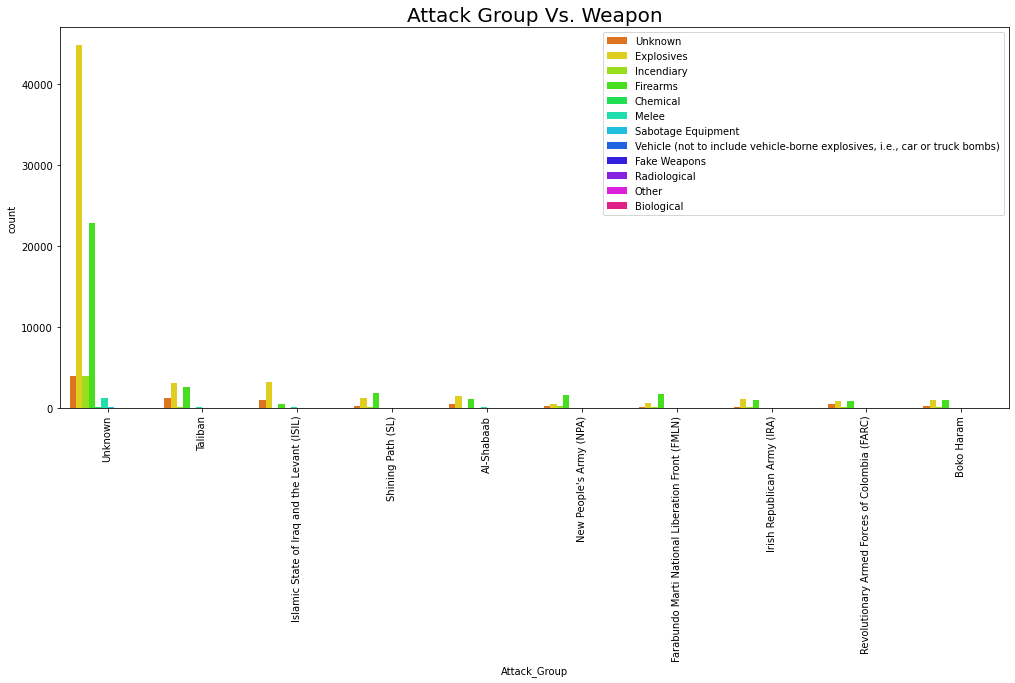

In [36]:
plt.figure(figsize=(17,7))
sns.countplot(df_terrorism["Attack_Group"], order=df_terrorism['Attack_Group'].value_counts().index[:10],hue =df_terrorism['Weapon'],palette = "hsv")
plt.title('Attack Group Vs. Weapon', fontsize = 20)
plt.legend(loc='upper right')
plt.xticks(rotation=90);

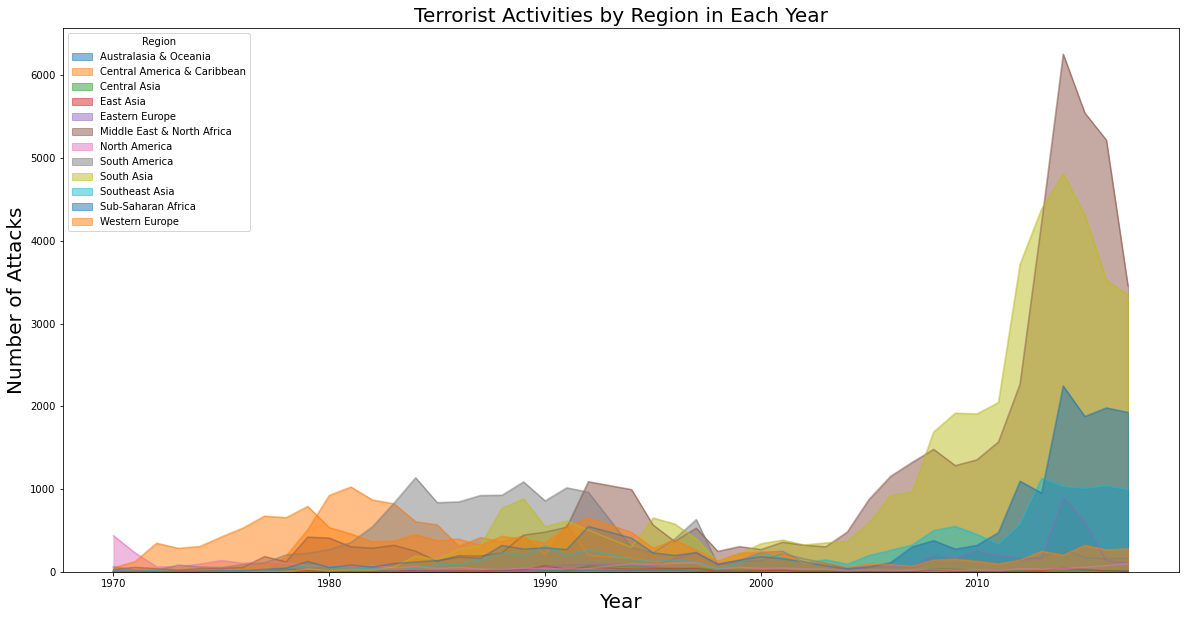

In [38]:
pd.crosstab(df_terrorism.Year,df_terrorism.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities by Region in Each Year',fontsize = 20)
plt.ylabel('Number of Attacks',fontsize = 20)
plt.xlabel('Year',fontsize = 20);

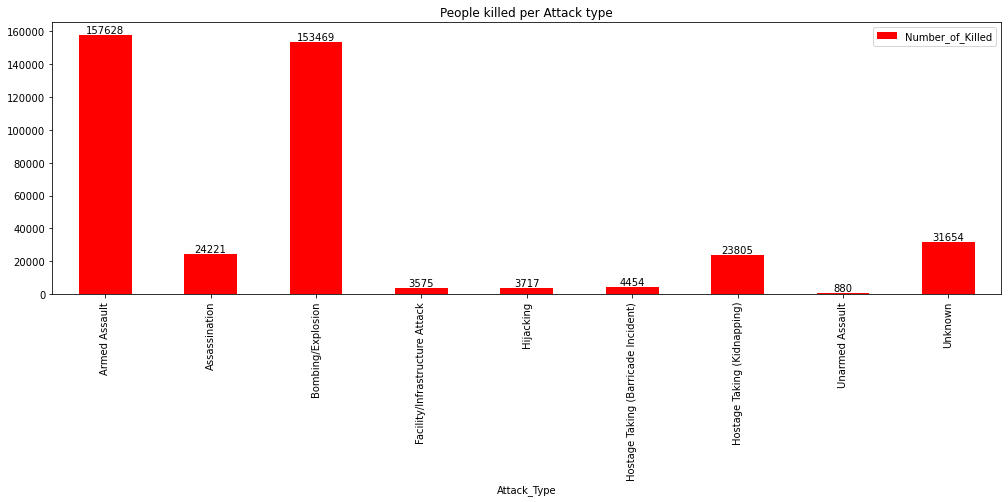

In [85]:
df1=df_terrorism[['Attack_Type','Number_of_Killed']].groupby(['Attack_Type'],axis=0).sum()
ax=df1.plot.bar(figsize=(17,5),color='r')
ax.bar_label(ax.containers[0],label_type='edge')
plt.title('People killed per Attack type');

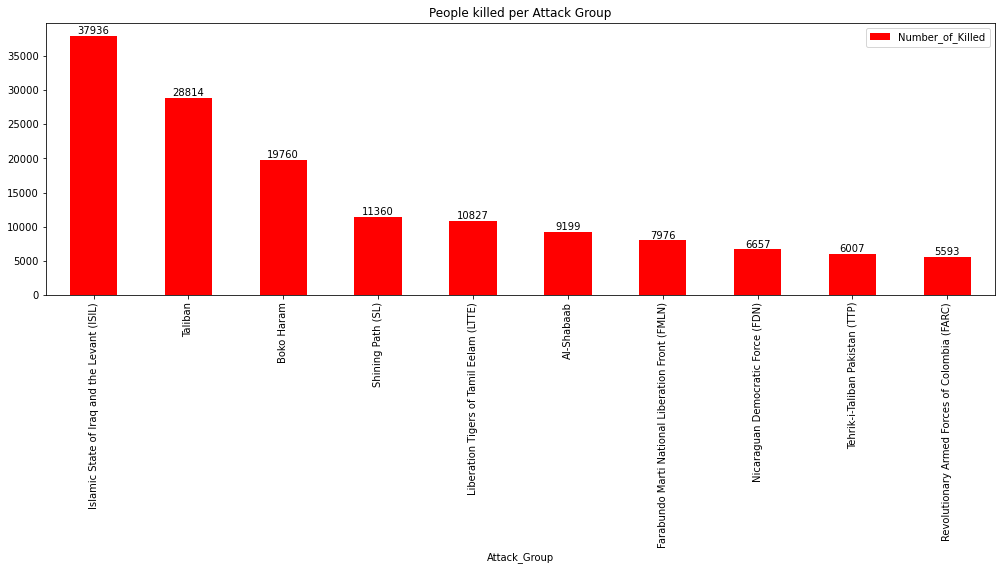

In [84]:
df2=df_terrorism[['Attack_Group','Number_of_Killed']].groupby(['Attack_Group'],axis=0).sum().drop('Unknown').sort_values('Number_of_Killed',ascending=False)[:10]
ax=df2.plot.bar(figsize=(17,5),color='r')
ax.bar_label(ax.containers[0],label_type='edge')
plt.title('People killed per Attack Group');

In [104]:
total_kill=df_terrorism.loc[:,'Number_of_Killed']
print('Total Number of lives lost in terrorist attacks', sum(total_kill))

Total Number of lives lost in terrorist attacks 403403.0


## Multivariate Analysis

In [96]:
df_terrorism.corr()

,Year,Month,Day,Extended,Success,Suicide,Number_of_Killed
Year,1.000000,-0.000732,0.017528,0.086789,-0.071156,0.135924,0.013994
Month,-0.000732,1.000000,0.004709,-0.001019,-0.001712,0.002966,0.003763
Day,0.017528,0.004709,1.000000,-0.003585,-0.008471,0.002610,-0.003950
Extended,0.086789,-0.001019,-0.003585,1.000000,0.076331,-0.037626,0.011842
Success,-0.071156,-0.001712,-0.008471,0.076331,1.000000,-0.031500,0.051688
Suicide,0.135924,0.002966,0.002610,-0.037626,-0.031500,1.000000,0.133445
Number_of_Killed,0.013994,0.003763,-0.003950,0.011842,0.051688,0.133445,1.000000


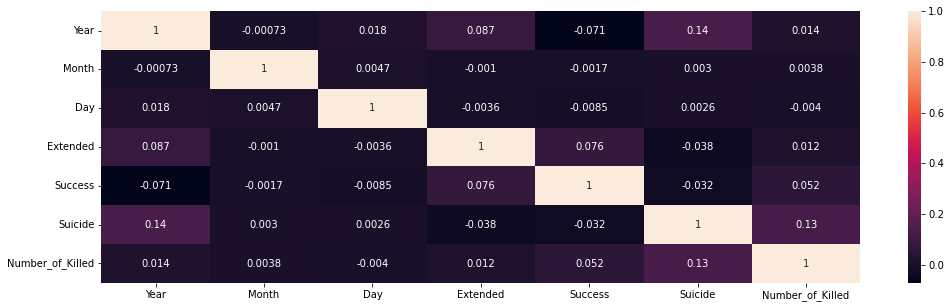

In [101]:
sns.heatmap(df_terrorism.corr(),annot=True)
plt.rcParams['figure.figsize']=(17,5);

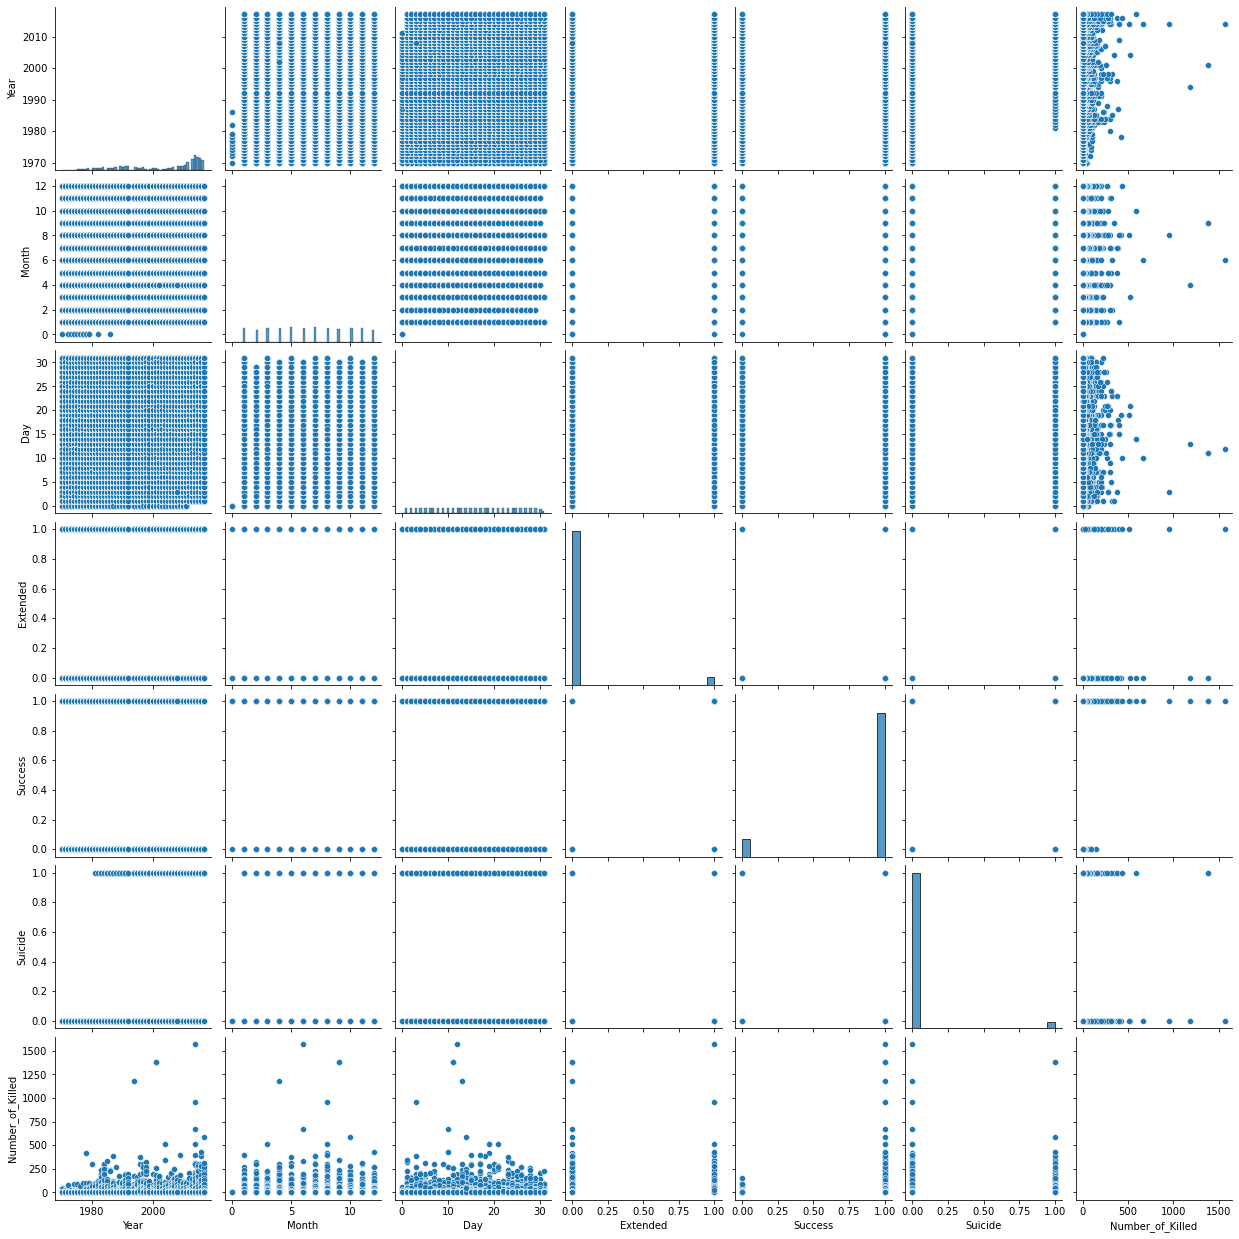

In [102]:
sns.pairplot(df_terrorism);

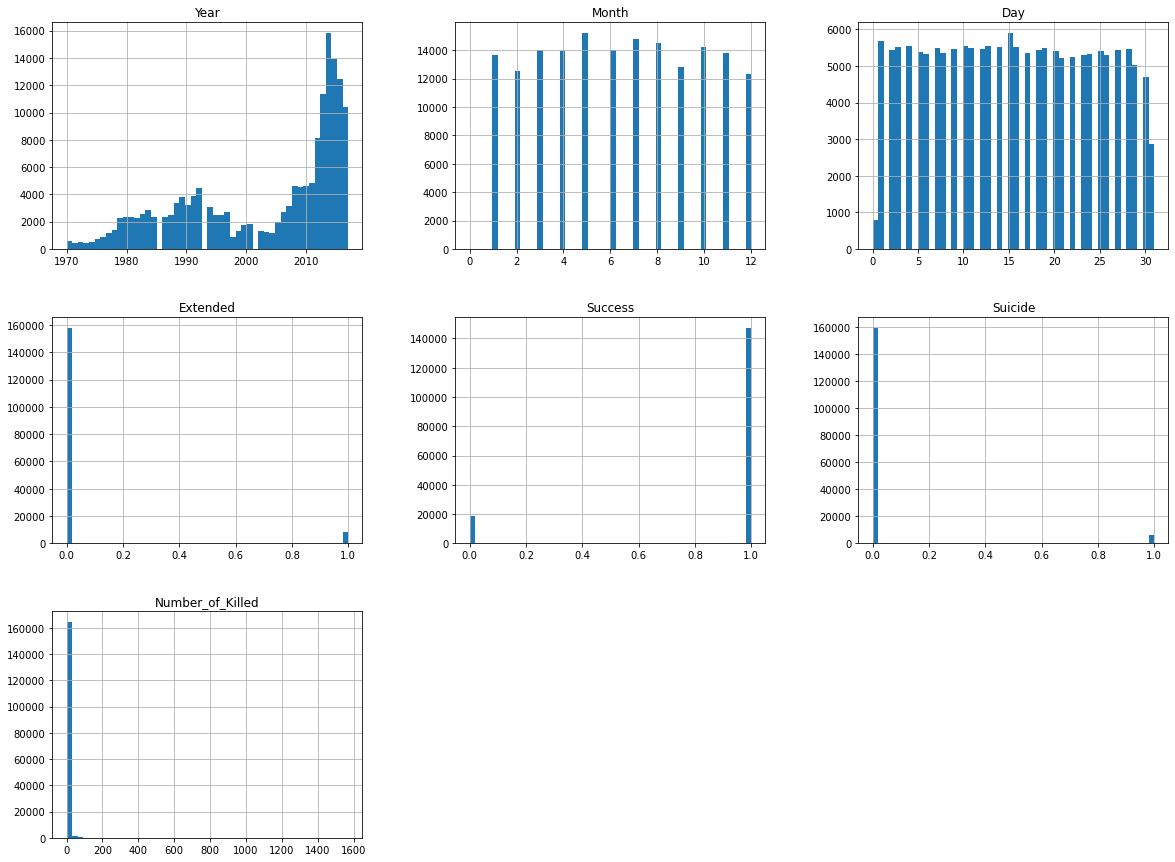

In [103]:
df_terrorism.hist(bins=50 ,figsize=(20,15));

# Summary
- The terrorist attack peaked from **2012** with year **2014 as the highest number of terrorist attacks** followed by **2015 and 2016**
- Most of number of terrorist activities was observed in the city of **Baghdad** and **Karachi**
- **Iraq**,**Pakistan** and **Afghanistan** were the major countries for the terrorist activities.
- The terrorist attacks in the region **Middle East,North Africa** and **South Asia** are more frequent.
- The terrorist attacks were mostly caused by attack groups known as **Taliban** and **Islamic State of Iraq and the Levant (ISIL)**
- **Bombing/Explosion,Armed Assualt and Assasinations** makes up for more than **85%** of attack methods.
- Most common types of targets includes **Private citizen and Property,Military, Police and Government** with more than **65%** of total targets.
- **Explosives and Firearms** makes for more than **85%** of the weapons used in terrorist activites.